## Imports

In [1]:
import pandas as pd

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

## Functions to merge data

We want to merge all the tables by matching the applicant's id. In complementary tables, one applicant may have multiple records. Therefore, we need to aggregate the data for each applicant with some statistics. For numerical columns, we aggregate them by count, sum, mean, median, maximum and minimum. For categorical column, we aggregate them by count, the mean and sum of the count. In this way, we merge all the data together into our main dataframe for training and testing.

## Function for Numeric Aggregations

In [3]:
def analyze_numeric_variable(df, group_variable, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_variable and 'SK_ID' in col:
            df = df.drop(columns = col)

    group_ids = df[group_variable]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_variable] = group_ids

    # Group by the specified variable and calculate the statistics
    aggregate = numeric_df.groupby(group_variable).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_variable]

    # Iterate through the variables names
    for var in aggregate.columns.levels[0]:
        # Skip the grouping variable
        if var != group_variable:
            # Iterate through the stat names
            for stat in aggregate.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    aggregate.columns = columns
    return aggregate

## Function to Handle Categorical Variables

In [4]:
def analyze_categorical_variable(df, group_var, df_name):
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

## Merge All the Data Together
![](https://kevinello-1302687393.file.myqcloud.com/picgo/2023/05/05/202305050202750-f19009.png)

### Merge bureau_balance.csv and bureau.csv

In [22]:
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')

### Counts of Bureau Dataframe

In [23]:
bureau_categorical = analyze_categorical_variable(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_categorical.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


### Aggregated Stats of Bureau Dataframe

In [24]:
bureau_numeric = analyze_numeric_variable(bureau.drop(columns = ['SK_ID_BUREAU']), group_variable = 'SK_ID_CURR', df_name = 'bureau')
bureau_numeric.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


### Value counts of Bureau Balance dataframe by loan

In [25]:
bureau_balance_categorical = analyze_categorical_variable(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_categorical.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


### Aggregated stats of Bureau Balance dataframe by loan

In [26]:
bureau_balance_numeric = analyze_numeric_variable(bureau_balance, group_variable = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_numeric.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


### Aggregated Stats of Bureau Balance by Client

In [27]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_numeric.merge(bureau_balance_categorical, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = analyze_numeric_variable(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_variable = 'SK_ID_CURR', df_name = 'client')

### Temporary write data to file for later use(save memory)

In [28]:
# Merge agg and counts
bureau_all = bureau_categorical.merge(bureau_numeric, on = 'SK_ID_CURR', how = 'outer')

# write to csv
bureau_all.to_csv('./tmp_data/bureau_all.csv', index = False)
bureau_balance_by_client.to_csv('./tmp_data/bureau_balance_by_client.csv', index = False)

In [30]:
# Free up memory by deleting old objects except train
import gc
gc.enable()
del bureau, bureau_balance, bureau_categorical, bureau_numeric, bureau_balance_numeric, bureau_balance_categorical, bureau_by_loan, bureau_balance_by_client, bureau_all
gc.collect()

0

### Merge previous_application.csv, POS_CASH_balance.csv, installments_payments.csv, credit_card_balance.csv

### Handle Previous Applications

In [7]:
previous_application = pd.read_csv('./data/previous_application.csv')

# Counts of Previous Applications
previous_application_categorical = analyze_categorical_variable(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')

# Aggregated Stats of Previous Applications Numeric Variables
previous_application_numeric = analyze_numeric_variable(previous_application.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'previous_application')

# Merge agg and counts
previous_application_all = previous_application_categorical.merge(previous_application_numeric, on = 'SK_ID_CURR', how = 'outer')

# write to csv
previous_application_all.to_csv('./tmp_data/previous_application_all.csv', index = False)

In [8]:
# GC
import gc
gc.enable()
del previous_application, previous_application_categorical, previous_application_numeric, previous_application_all
gc.collect()

0

### Handle POS Cash Balance

In [9]:
pos_cash_balance = pd.read_csv('./data/POS_CASH_balance.csv')

# Counts of each type of past loan for each client
pos_cash_balance_categorical = analyze_categorical_variable(pos_cash_balance, group_var = 'SK_ID_CURR', df_name = 'pos_cash_balance')

# Aggregated stats of pos_cash_balance
pos_cash_balance_numeric = analyze_numeric_variable(pos_cash_balance.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'pos_cash_balance')

# Merge agg and counts
pos_cash_balance_by_client = pos_cash_balance_numeric.merge(pos_cash_balance_categorical, on = 'SK_ID_CURR', how = 'outer')

# write to csv
pos_cash_balance_by_client.to_csv('./tmp_data/pos_cash_balance_all.csv', index = False)

In [10]:
# GC
import gc
gc.enable()
del pos_cash_balance, pos_cash_balance_categorical, pos_cash_balance_numeric, pos_cash_balance_by_client
gc.collect()

0

### Handle Installment Payments

In [11]:
installments_payments = pd.read_csv('./data/installments_payments.csv')

# Installments Payments have no categorical features to counts
# Aggregated stats of installments_payments
installments_payments_numeric = analyze_numeric_variable(installments_payments.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'installments_payments')

# write to csv
installments_payments_numeric.to_csv('./tmp_data/installments_payments_all.csv', index = False)

In [12]:
# GC
import gc
gc.enable()
del installments_payments, installments_payments_numeric
gc.collect()

0

### Handle Credit Card Balance

In [13]:
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')

# Counts of each type of past loan for each client
credit_card_balance_categorical = analyze_categorical_variable(credit_card_balance, group_var = 'SK_ID_CURR', df_name = 'credit_card_balance')

# Aggregated stats of credit_card_balance
credit_card_balance_numeric = analyze_numeric_variable(credit_card_balance.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'credit_card_balance')

# Merge agg and counts
credit_card_balance_all = credit_card_balance_numeric.merge(credit_card_balance_categorical, on = 'SK_ID_CURR', how = 'outer')

# write to csv
credit_card_balance_all.to_csv('./tmp_data/credit_card_balance_all.csv', index = False)

In [14]:
# GC
import gc
gc.enable()
del credit_card_balance, credit_card_balance_categorical, credit_card_balance_numeric, credit_card_balance_all
gc.collect()

0

### Handle POS Cash Balance with previous applications

In [15]:
previous_application = pd.read_csv('./data/previous_application.csv')
pos_cash_balance = pd.read_csv('./data/POS_CASH_balance.csv')

# Value Counts of POS Cash Balance by prev application
pos_cash_balance_categorical = analyze_categorical_variable(pos_cash_balance, group_var = 'SK_ID_PREV', df_name = 'pos_cash_balance')

# Aggregated Stats of POS Cash Balance by prev application
pos_cash_balance_numeric = analyze_numeric_variable(pos_cash_balance, group_variable = 'SK_ID_PREV', df_name = 'pos_cash_balance')

# Aggregated Stats of POS Cash Balance by Client
# Merge agg and counts of pos cash balance
pos_cash_balance_by_prev = pos_cash_balance_numeric.merge(pos_cash_balance_categorical, right_index = True, left_on = 'SK_ID_PREV', how = 'outer')

# Merge to include the SK_ID_CURR
pos_cash_balance_by_prev = previous_application[['SK_ID_PREV', 'SK_ID_CURR']].merge(pos_cash_balance_by_prev, on = 'SK_ID_PREV', how = 'left')

# Aggregate the stats for each client
pos_cash_balance_by_client = analyze_numeric_variable(pos_cash_balance_by_prev.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'client')

# write to csv
pos_cash_balance_by_client.to_csv('./tmp_data/pos_cash_balance_by_client.csv', index = False)

In [16]:
# GC
import gc
gc.enable()
del previous_application, pos_cash_balance, pos_cash_balance_categorical, pos_cash_balance_numeric, pos_cash_balance_by_prev, pos_cash_balance_by_client
gc.collect()

0

### Handle Installment Payments with previous applications

In [17]:
previous_application = pd.read_csv('./data/previous_application.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')

# Installments Payments have no categorical features
# Aggregated Stats of Installments Payments by prev application
installments_payments_numeric = analyze_numeric_variable(installments_payments, group_variable = 'SK_ID_PREV', df_name = 'installments_payments')

# Aggregated Stats of Installments Payments by Client
# Merge to include the SK_ID_CURR
installments_payments_by_prev = previous_application[['SK_ID_PREV', 'SK_ID_CURR']].merge(installments_payments_numeric, on = 'SK_ID_PREV', how = 'left')

# Aggregate the stats for each client
installments_payments_by_client = analyze_numeric_variable(installments_payments_by_prev.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'client')

# write to csv
installments_payments_by_client.to_csv('./tmp_data/installments_payments_by_client.csv', index = False)

In [34]:
# GC
import gc
gc.enable()
del previous_application, installments_payments, installments_payments_numeric, installments_payments_by_prev, installments_payments_by_client
gc.collect()

0

### Handle Credit Card Balance with previous applications

In [6]:
previous_application = pd.read_csv('./data/previous_application.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')

# Counts of Credit Card balance by client
credit_card_balance_categorical = analyze_categorical_variable(credit_card_balance, group_var = 'SK_ID_PREV', df_name = 'credit_card_balance')

# Aggregated Stats of Credit Card balance by client
credit_card_balance_numeric = analyze_numeric_variable(credit_card_balance, group_variable = 'SK_ID_PREV', df_name = 'credit_card_balance')

# Aggregated Stats of Credit Card balance by Client
# Merge agg and counts of credit card balance
credit_card_balance_by_prev = credit_card_balance_numeric.merge(credit_card_balance_categorical, right_index = True, left_on = 'SK_ID_PREV', how = 'outer')

# Merge to include the SK_ID_CURR
credit_card_balance_by_prev = previous_application[['SK_ID_PREV', 'SK_ID_CURR']].merge(credit_card_balance_by_prev, on = 'SK_ID_PREV', how = 'left')

# Aggregate the stats for each client
credit_card_balance_by_client = analyze_numeric_variable(credit_card_balance_by_prev.drop(columns = ['SK_ID_PREV']), group_variable = 'SK_ID_CURR', df_name = 'client')

# write to csv
credit_card_balance_by_client.to_csv('./tmp_data/credit_card_balance_by_client.csv', index = False)

In [7]:
# GC
import gc
gc.enable()
del previous_application, credit_card_balance, credit_card_balance_categorical, credit_card_balance_numeric, credit_card_balance_by_prev, credit_card_balance_by_client
gc.collect()

0

## Merge All temp Dataframes Together

In [1]:
import gc
import pandas as pd

train = pd.DataFrame()

reader = pd.read_csv('./data/application_train.csv', chunksize=10000)

for chunk in reader:
    chunk: pd.DataFrame
    chunk = chunk.sample(frac=0.3, random_state=1)
    if train.empty:
        train = chunk
    else:
        train = pd.concat([train, chunk])

train.shape

(92253, 122)

In [2]:
# dummy all the categorical features
train = pd.get_dummies(train)
train.to_csv('./data/train_sampled_dummied.csv', index = False)

In [4]:
bureau_all = pd.read_csv('./tmp_data/bureau_all.csv')
train = train.merge(bureau_all, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del bureau_all
gc.collect()

0

In [5]:
bureau_balance_by_client = pd.read_csv('./tmp_data/bureau_balance_by_client.csv')
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del bureau_balance_by_client
gc.collect()

0

In [6]:
previous_application_all = pd.read_csv('./tmp_data/previous_application_all.csv')
train = train.merge(previous_application_all, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del previous_application_all
gc.collect()

0

In [7]:
pos_cash_balance_all = pd.read_csv('./tmp_data/pos_cash_balance_all.csv')
train = train.merge(pos_cash_balance_all, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del pos_cash_balance_all
gc.collect()

0

In [8]:
pos_cash_balance_by_client = pd.read_csv('./tmp_data/pos_cash_balance_by_client.csv')
train = train.merge(pos_cash_balance_by_client, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del pos_cash_balance_by_client
gc.collect()

0

In [9]:
installments_payments_all = pd.read_csv('./tmp_data/installments_payments_all.csv')
train = train.merge(installments_payments_all, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del installments_payments_all
gc.collect()

0

In [10]:
installments_payments_by_client = pd.read_csv('./tmp_data/installments_payments_by_client.csv')
train = train.merge(installments_payments_by_client, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del installments_payments_by_client
gc.collect()

0

In [11]:
credit_card_balance_all = pd.read_csv('./tmp_data/credit_card_balance_all.csv')
train = train.merge(credit_card_balance_all, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del credit_card_balance_all
gc.collect()

0

In [12]:
credit_card_balance_by_client = pd.read_csv('./tmp_data/credit_card_balance_by_client.csv')
train = train.merge(credit_card_balance_by_client, on = 'SK_ID_CURR', how = 'left')
gc.enable()
del credit_card_balance_by_client
gc.collect()

0

In [13]:
# write merged data to csv
train.to_csv('./data/merged_train.csv', index = False)

In [14]:
print(train.shape)
gc.enable()
del train
gc.collect()

(92253, 1959)


0

## Handle Missing Values
calculate the missing values in each column and then divide by the number of rows in the dataframe.
delete any columns in the data that have greater than 90% missing values.

read merged data from file in chunks

In [8]:
import pandas as pd

merged_train_iterator = pd.read_csv('./data/merged_train.csv', chunksize=5000)

In [9]:
missing_merged_train = pd.DataFrame()
row_count = 0
for chunk in merged_train_iterator:
    row_count += chunk.shape[0]
    if missing_merged_train.empty:
        missing_merged_train = chunk.isnull().sum()
    else:
        chunk_missing = chunk.isnull().sum()
        missing_merged_train = missing_merged_train.add(chunk_missing, fill_value=0)
merged_train_iterator.close()

In [10]:
mis_val_percent = 100 * missing_merged_train / row_count
missing_merged_train = pd.concat([missing_merged_train, mis_val_percent], axis=1)
missing_merged_train = missing_merged_train.rename(columns = {0 : 'missing_count', 1 : 'missing_percent'})
missing_merged_train.index.name = 'column_name'
missing_merged_train = missing_merged_train.sort_values(by='missing_percent', ascending=False)
missing_merged_train.head(10)
missing_merged_train.to_csv('./tmp_data/missing_merged_train.csv', index = True)

In [11]:
import pandas as pd

missing_merged_train = pd.read_csv('./tmp_data/missing_merged_train.csv')
missing_merged_train_vars = missing_merged_train[missing_merged_train['missing_percent'] > 30]['column_name'].tolist()
len(missing_merged_train_vars)

576

## Correlations

Then look at the correlations of the variables with the target. We can see in any of the variables we created have a greater correlation than those already present in the training data (from `application`). 

cause the data is too large, we can use `chunks correlation` to calculate the correlation between the data and the target.

### Firstly get weighted average correlation and corr_matrices(corr_matrix list)

In [12]:
import numpy as np

# create an empty list to store each chunk's correlation matrix
corr_matrices = []
weights = []

file_path = './data/merged_train.csv'
chunk_size = 10000
merged_train_iterator = pd.read_csv(file_path, chunksize=chunk_size)
for chunk in merged_train_iterator:
    chunk.drop(columns = missing_merged_train_vars, inplace = True)
    corr_matrix = chunk.corr()
    corr_matrices.append(corr_matrix)
    weights.append(len(chunk))

weights_normalized = np.array(weights) / sum(weights)
columns = corr_matrices[0].columns
index = corr_matrices[0].index

### Secondly get weighted average correlation using the Fisher transformation

In [13]:
# Perform the Fisher transformation on the correlation coefficients
fisher_corr_coeffs = np.arctanh(corr_matrices)

# Calculate the weighted average of the Fisher transformed correlation coefficients
weighted_fisher_corr_coeffs = np.average(fisher_corr_coeffs, weights=weights_normalized, axis=0)

# Invert the Fisher transformation to obtain the estimated correlation matrix
weighted_corr_matrix_fisher = np.tanh(weighted_fisher_corr_coeffs)

# Convert the NumPy array back to Pandas DataFrame with the same row/column indices
weighted_corr_matrix_fisher = pd.DataFrame(weighted_corr_matrix_fisher, columns = columns, index = columns)
weighted_corr_matrix_fisher.index.name = 'column_name'

weighted_corr_matrix_fisher

column_name,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,client_credit_card_balance_NAME_CONTRACT_STATUS_Refused_count_norm_count,client_credit_card_balance_NAME_CONTRACT_STATUS_Refused_count_norm_sum,client_credit_card_balance_NAME_CONTRACT_STATUS_Sent proposal_count_count,client_credit_card_balance_NAME_CONTRACT_STATUS_Sent proposal_count_sum,client_credit_card_balance_NAME_CONTRACT_STATUS_Sent proposal_count_norm_count,client_credit_card_balance_NAME_CONTRACT_STATUS_Sent proposal_count_norm_sum,client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_count,client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_sum,client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_norm_count,client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_norm_sum
column_name,,,,,,,,,,,,,,,,,,,,,
SK_ID_CURR,1.000000,-0.004250,-0.000616,0.004294,0.004715,0.001096,0.004708,0.002165,0.002463,-0.001278,...,0.005074,NaN,0.005074,0.006373,0.005074,0.006391,0.005074,-0.000024,0.005074,-0.003039
TARGET,-0.004250,1.000000,0.020318,-0.026235,-0.028464,-0.014012,-0.037901,-0.039622,0.077786,-0.043113,...,0.018423,NaN,0.018423,-0.005291,0.018423,-0.005192,0.018423,-0.002103,0.018423,0.004187
CNT_CHILDREN,-0.000616,0.020318,1.000000,0.024867,0.000387,0.017238,-0.003123,-0.021327,0.328403,-0.238518,...,-0.004942,NaN,-0.004942,-0.002407,-0.004942,-0.002049,-0.004942,0.000785,-0.004942,0.002611
AMT_INCOME_TOTAL,0.004294,-0.026235,0.024867,1.000000,0.375948,0.452640,0.382567,0.189230,0.060915,-0.147898,...,0.048091,NaN,0.048091,0.007452,0.048091,0.007559,0.048091,0.000838,0.048091,-0.001129
AMT_CREDIT,0.004715,-0.028464,0.000387,0.375948,1.000000,0.770564,0.986980,0.106686,-0.057670,-0.067017,...,0.023026,NaN,0.023026,0.007761,0.023026,0.007506,0.023026,0.013817,0.023026,0.003535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
client_credit_card_balance_NAME_CONTRACT_STATUS_Sent proposal_count_norm_sum,0.006391,-0.005192,-0.002049,0.007559,0.007506,0.001664,0.008175,0.005729,-0.007504,-0.003732,...,0.066487,NaN,0.066487,0.996287,0.066487,1.000000,0.066487,0.003471,0.066487,-0.000066
client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_count,0.005074,0.018423,-0.004942,0.048091,0.023026,0.004669,0.011578,0.014498,0.019535,-0.059106,...,1.000000,NaN,1.000000,0.066733,1.000000,0.066487,1.000000,0.079965,1.000000,0.111639
client_credit_card_balance_NAME_CONTRACT_STATUS_Signed_count_sum,-0.000024,-0.002103,0.000785,0.000838,0.013817,0.005035,0.012476,-0.001540,-0.004084,-0.001078,...,0.079965,NaN,0.079965,0.003990,0.079965,0.003471,0.079965,1.000000,0.079965,0.633834


### Delete low correlation columns

In [14]:
sorted_corr = pd.DataFrame(weighted_corr_matrix_fisher.sort_values('TARGET', ascending = False)['TARGET']).dropna().drop('TARGET', axis = 0)
sorted_corr

,TARGET
column_name,
bureau_DAYS_CREDIT_mean,0.089530
bureau_DAYS_CREDIT_min,0.078210
DAYS_BIRTH,0.077786
previous_application_NAME_CONTRACT_STATUS_Refused_count_norm,0.075993
bureau_CREDIT_ACTIVE_Active_count_norm,0.074103
...,...
previous_application_NAME_CONTRACT_STATUS_Approved_count_norm,-0.061710
previous_application_CODE_REJECT_REASON_XAP_count_norm,-0.072281
bureau_CREDIT_ACTIVE_Closed_count_norm,-0.076186


In [15]:
sorted_corr.head(10)

,TARGET
column_name,
bureau_DAYS_CREDIT_mean,0.089530
bureau_DAYS_CREDIT_min,0.078210
DAYS_BIRTH,0.077786
previous_application_NAME_CONTRACT_STATUS_Refused_count_norm,0.075993
bureau_CREDIT_ACTIVE_Active_count_norm,0.074103
bureau_DAYS_CREDIT_UPDATE_mean,0.069012
previous_application_NAME_CONTRACT_STATUS_Refused_count,0.064535
previous_application_NAME_PRODUCT_TYPE_walk-in_count,0.062914
client_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_mean_sum,0.062887


In [16]:
sorted_corr.tail(10)

,TARGET
column_name,
client_installments_payments_NUM_INSTALMENT_VERSION_min_min,-0.044503
previous_application_DAYS_FIRST_DRAWING_min,-0.046825
previous_application_DAYS_FIRST_DRAWING_mean,-0.051959
CODE_GENDER_F,-0.052306
NAME_EDUCATION_TYPE_Higher education,-0.054662
previous_application_NAME_CONTRACT_STATUS_Approved_count_norm,-0.061710
previous_application_CODE_REJECT_REASON_XAP_count_norm,-0.072281
bureau_CREDIT_ACTIVE_Closed_count_norm,-0.076186
EXT_SOURCE_2,-0.161600


### Collinear Variables

We can calculate not only the correlations of the variables with the target, but also the correlation of each variable with every other variable. This will allow us to see if there are highly collinear variables that should perhaps be removed from the data. 

Let's look for any variables that have a greather than 0.8 correlation with other variables.

In [17]:
# Set the threshold
threshold = 0.85

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in weighted_corr_matrix_fisher:
    above_threshold_vars[col] = list(weighted_corr_matrix_fisher.index[weighted_corr_matrix_fisher[col] > threshold])

For each of these pairs of highly correlated variables, we only want to remove one of the variables. The following code creates a set of variables to remove by only adding one of each pair. 

In [18]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            continue
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  637


### Drop high missing value percent columns and collinear columns

In [19]:
import pandas as pd

missing_merged_train = pd.read_csv('./tmp_data/missing_merged_train.csv')
missing_merged_train_vars = missing_merged_train[missing_merged_train['missing_percent'] > 30]['column_name'].tolist()
cols_to_remove.extend(missing_merged_train_vars)
print('Number of columns to remove: ', len(cols_to_remove))

file_path = './data/merged_train.csv'
chunk_size = 10000
merged_train_iterator = pd.read_csv(file_path, chunksize=chunk_size)

with open('./data/merged_train_reduced.csv', 'w') as f:
    for chunk in merged_train_iterator:
        chunk.drop(columns = cols_to_remove, inplace = True)
        chunk.to_csv(f, header=f.tell()==0, index=False)

Number of columns to remove:  1213


### Split train and test data

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

sampled_data = pd.read_csv('./data/merged_train_reduced.csv', index_col=None)
sampled_data.shape

(92253, 746)

In [2]:
X = sampled_data.drop(columns = ['TARGET']).reset_index()
y = sampled_data['TARGET'].reset_index()

# X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [3]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [4]:
X_train.index

RangeIndex(start=0, stop=73802, step=1)

In [5]:
y_train.index

Int64Index([13338, 83896, 17219, 26572, 14444, 18737, 77308, 54955, 28787,
            34157,
            ...
            50628,  8559, 34887, 55391, 41030, 55366, 59358, 48417, 22637,
            14000],
           dtype='int64', length=73802)

Reset y's index to RangeIndex, or it will mismatch with X's index

In [6]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [7]:
y_train.index

RangeIndex(start=0, stop=73802, step=1)

In [8]:
# delete column 'index'
X_train.drop(columns = ['index'], inplace = True)
X_test.drop(columns = ['index'], inplace = True)
y_train.drop(columns = ['index'], inplace = True)
y_test.drop(columns = ['index'], inplace = True)

In [9]:
import gc
gc.enable()
del sampled_data, X, y, imputer
gc.collect()

0

## Modeling

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc

In [11]:
features = X_train.columns.tolist()
features.remove('SK_ID_CURR')
X_train = X_train[features]
X_test = X_test[features]

In [12]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]

### Prepare model classes

In [13]:
NFOLDS = 3
SEED = 0
NROWS = None

kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, X_train, y_train):
        dtrain = xgb.DMatrix(X_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        print(f'Fold {i}')
        print(f'Train index: {train_index}, len: {len(train_index)}')
        print(f'Test index: {test_index}, len: {len(test_index)}')
        x_tr = X_train.loc[train_index]
        y_tr = y_train.loc[train_index]
        x_te = X_train.loc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(X_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

catboost_params = {
    'iterations': 200,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 40,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.7,
    'scale_pos_weight': 5,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'allow_writing_files': False
}

lightgbm_params = {
    'n_estimators':200,
    'learning_rate':0.1,
    'num_leaves':123,
    'colsample_bytree':0.8,
    'subsample':0.9,
    'max_depth':15,
    'reg_alpha':0.1,
    'reg_lambda':0.1,
    'min_split_gain':0.01,
    'min_child_weight':2    
}

### Prepare model parameters

In [14]:
xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
cb = CatboostWrapper(clf=CatBoostClassifier, seed = SEED, params=catboost_params)
# lg = LightGBMWrapper(clf=LGBMClassifier, seed = SEED, params=lightgbm_params)

### Start training base models(xgboost, extra-trees classifier, catboost, random forest)

In [15]:
xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
cb_oof_train, cb_oof_test = get_oof(cb)

Fold 0
Train index: [    0     1     2 ... 73797 73799 73801], len: 49201
Test index: [    3    14    17 ... 73796 73798 73800], len: 24601
[21:32:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Fold 1
Train index: [    2     3     5 ... 73798 73799 73800], len: 49201
Test index: [    0     1     4 ... 73795 73797 73801], len: 24601
[21:33:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Fold 2
Train index: [    0     1     3 ... 73798 73800 73801], len: 49202
Test index: [    2     5     8 ... 73789 73790 73799], len: 24600
[21:33:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Fold 0
Train index: [    0     1     2 ... 73797 73799 73801], len: 49201
Test index: [    3    14    17 ... 73796 73798 73800], len: 24601


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 1
Train index: [    2     3     5 ... 73798 73799 73800], len: 49201
Test index: [    0     1     4 ... 73795 73797 73801], len: 24601


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 2
Train index: [    0     1     3 ... 73798 73800 73801], len: 49202
Test index: [    2     5     8 ... 73789 73790 73799], len: 24600


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 0
Train index: [    0     1     2 ... 73797 73799 73801], len: 49201
Test index: [    3    14    17 ... 73796 73798 73800], len: 24601


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 1
Train index: [    2     3     5 ... 73798 73799 73800], len: 49201
Test index: [    0     1     4 ... 73795 73797 73801], len: 24601


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 2
Train index: [    0     1     3 ... 73798 73800 73801], len: 49202
Test index: [    2     5     8 ... 73789 73790 73799], len: 24600


/tmp/ipykernel_2565489/3205277707.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.clf.fit(X_train, y_train)


Fold 0
Train index: [    0     1     2 ... 73797 73799 73801], len: 49201
Test index: [    3    14    17 ... 73796 73798 73800], len: 24601
0:	total: 69.9ms	remaining: 13.9s
1:	total: 99.7ms	remaining: 9.87s
2:	total: 121ms	remaining: 7.95s
3:	total: 150ms	remaining: 7.33s
4:	total: 181ms	remaining: 7.05s
5:	total: 211ms	remaining: 6.83s
6:	total: 243ms	remaining: 6.69s
7:	total: 269ms	remaining: 6.45s
8:	total: 291ms	remaining: 6.17s
9:	total: 316ms	remaining: 6.01s
10:	total: 340ms	remaining: 5.85s
11:	total: 362ms	remaining: 5.67s
12:	total: 383ms	remaining: 5.51s
13:	total: 405ms	remaining: 5.38s
14:	total: 427ms	remaining: 5.27s
15:	total: 448ms	remaining: 5.15s
16:	total: 468ms	remaining: 5.04s
17:	total: 490ms	remaining: 4.96s
18:	total: 517ms	remaining: 4.92s
19:	total: 538ms	remaining: 4.84s
20:	total: 563ms	remaining: 4.8s
21:	total: 584ms	remaining: 4.72s
22:	total: 607ms	remaining: 4.67s
23:	total: 629ms	remaining: 4.62s
24:	total: 652ms	remaining: 4.56s
25:	total: 672ms	re

### base-model error rate on train data

In [16]:
print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, cb_oof_train))))

XG-CV: 0.2614401128872198
ET-CV: 0.2642154628889398
RF-CV: 0.26437913449223965
RF-CV: 0.3282233729772718


### base-model error rate on test data

In [17]:
print("XG-CV: {}".format(sqrt(mean_squared_error(y_test, xg_oof_test))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_test, et_oof_test))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_test, rf_oof_test))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_test, cb_oof_test))))

XG-CV: 0.2576224284052422
ET-CV: 0.2615720574941059
RF-CV: 0.2616749471839922
RF-CV: 0.3191161007141889


### Start training meta-model

In [18]:
stacking_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train, cb_oof_train), axis=1)
stacking_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test, cb_oof_test), axis=1)

print("{},{}".format(stacking_train.shape, stacking_test.shape))

logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(stacking_train, y_train)

(73802, 4),(18451, 4)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print("LR-STACKING-CV: {}".format(sqrt(mean_squared_error(y_train, logistic_regression.predict(stacking_train)))))

LR-STACKING-CV: 0.28524788979984994


### Predict test data

In [20]:
y_pred = logistic_regression.predict_proba(stacking_test)[:,1]

# transform y_pred to dataFrame and save it
y_pred = pd.DataFrame(y_pred, columns=['target_score'])
y_pred.to_csv('./final_data/predict.csv', index_label='id')

In [21]:
y_test.to_csv('./final_data/true.csv', index_label='id')

### Save model

In [43]:
# save model
import pickle

with open('./final_data/model.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)

### Draw ROC curve

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred = pd.read_csv('./final_data/predict.csv')
y_test = pd.read_csv('./final_data/true.csv')

fpr, tpr, thresholds = roc_curve(y_test['TARGET'], y_pred['target_score'])

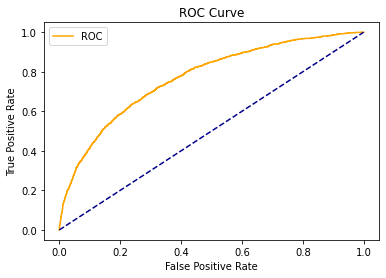

In [41]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Calculate AUC score

In [42]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test['TARGET'], y_pred['target_score'])
print('AUC: %.2f' % auc)

AUC: 0.77


### Calculate error rate

In [90]:
y_pred = pd.read_csv('./final_data/predict.csv')
y_test = pd.read_csv('./final_data/true.csv')

y_pred['TARGET'] = y_pred['target_score'].apply(lambda x: 1 if x > 0.5 else 0)

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test['TARGET'], y_pred['TARGET'])
cf_matrix

array([[16906,    65],
       [ 1415,    65]])

In [91]:
# get squared error
from sklearn.metrics import mean_squared_error

print("LR-STACKING-PRED: {}".format(sqrt(mean_squared_error(y_test['TARGET'], y_pred['TARGET']))))

LR-STACKING-PRED: 0.2832180336940186
